## Handson Feature Scaling -Part3
 - sklearn - RobustScaler 
 - Youtube Explanation :  https://youtu.be/EUJa1v0fBmM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# load the other dataset
df_country = pd.read_excel("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Feature_Engineering/Scaling.xlsx")
df_country                      

,Experience,Salary,Country_Type
0,1,30,Devloping
1,3,35,Developed
2,4,43,Devloping
3,5,36,Developed
4,6,27,Devloping
5,4,32,Developed
6,5,18,Developed
7,3,10,Developed
8,2,12,Devloping
9,5,11,Devloping


In [3]:
X = df_country.drop("Country_Type",axis=1)
y = df_country["Country_Type"]

In [4]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(15, 2)
(15,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# First we will devide the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10, 2)
(10,)
(5, 2)
(5,)


In [8]:
df_exp = X_train

In [9]:
df_exp

,Experience,Salary
8,2,12
2,4,43
1,3,35
14,1,8
4,6,27
7,3,10
10,4,37
12,3,14
3,5,36
6,5,18


In [10]:
X_test

,Experience,Salary
9,5,11
11,5,21
0,1,30
13,2,16
5,4,32


### Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# create the object
std_scale = StandardScaler()
# fit and transform the columns ("Experience" and "Salary")
df_exp_std = std_scale.fit_transform(df_exp.iloc[:,0:2])
print(type(df_exp_std))
df_exp_std_new = pd.DataFrame(df_exp_std,columns=["Experience","Salary"])
df_exp_std_new

<class 'numpy.ndarray'>


,Experience,Salary
0,-1.120224,-0.968246
1,0.280056,1.533056
2,-0.420084,0.887559
3,-1.820364,-1.290994
4,1.680336,0.242061
5,-0.420084,-1.129620
6,0.280056,1.048933
7,-0.420084,-0.806872
8,0.980196,0.968246
9,0.980196,-0.484123


In [13]:
print("std: ",round(df_exp_std_new.Experience.std(),0))
print("mean: ",round(df_exp_std_new.Experience.mean(),2))

std:  1.0
mean:  -0.0


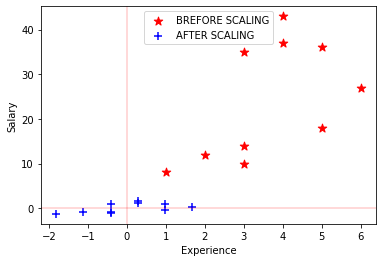

In [14]:
ax = df_exp.plot.scatter(x="Experience", y="Salary",marker = '*',s=80, label='BREFORE SCALING',color='red')
df_exp_std_new.plot.scatter(x="Experience", y="Salary",marker = '+',s=60,label='AFTER SCALING',
                               color='blue', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

### Robust Scaler

  - As the name suggests, this Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated **mean and standard deviation will be skewed by the presence of the outliers.**
  - One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.This is called robust standardization or robust data scaling.
  - This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.
  
$$
X(scale) = \frac{X – median}{p75 – p25}
$$

  - The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.

In [15]:
x = [1,2,3,4,5,6,7,8,9,15]
# Standardization using numpy
import numpy as np
x_np = np.array(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()
print("z_scores using numpy :",z_scores_np)

z_scores using numpy : [-1.29099445 -1.03279556 -0.77459667 -0.51639778 -0.25819889  0.
  0.25819889  0.51639778  0.77459667  2.32379001]


In [16]:
import numpy as np
x_np = np.array(x)
x_sc = (x_np-np.median(x_np))/(np.quantile(x_np,0.75)-np.quantile(x_np,0.25))
x_sc
# interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  2.11111111])

In [17]:
x_np

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 15])

In [18]:
np.median(x_np)

5.5

In [19]:
np.quantile(x_np,0.75,interpolation='midpoint')

7.5

In [20]:
np.quantile(x_np,0.25,interpolation='lower')

3

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
# create the object
rbst_scale = RobustScaler()
# default value is quantile_range=(25.0, 75.0), we can change this.
df_exp_rbst = rbst_scale.fit_transform(x_np.reshape(-1, 1))
df_exp_rbst

array([[-1.        ],
       [-0.77777778],
       [-0.55555556],
       [-0.33333333],
       [-0.11111111],
       [ 0.11111111],
       [ 0.33333333],
       [ 0.55555556],
       [ 0.77777778],
       [ 2.11111111]])

In [23]:
# create the object
rbst_scale = RobustScaler()
# default value is quantile_range=(25.0, 75.0), we can change this.
# fit and transform the columns ("Experience" and "Salary")
df_exp_rbst = rbst_scale.fit_transform(df_exp.iloc[:,0:2])
print(type(df_exp_std))
df_exp_rbst_new = pd.DataFrame(df_exp_rbst,columns=["Experience","Salary"])
df_exp_rbst_new

<class 'numpy.ndarray'>


,Experience,Salary
0,-0.857143,-0.451613
1,0.285714,0.881720
2,-0.285714,0.537634
3,-1.428571,-0.623656
4,1.428571,0.193548
5,-0.285714,-0.537634
6,0.285714,0.623656
7,-0.285714,-0.365591
8,0.857143,0.580645
9,0.857143,-0.193548


default value is quantile_range=(25.0, 75.0)

The range used to scale each variable is chosen by default as the IQR is bounded by the 25th and 75th percentiles.
This is specified by the “quantile_range” argument as a tuple.
Other values can be specified and might improve the performance of the model, such as a wider range, allowing fewer values to be considered outliers, or a more narrow range, allowing more values to be considered outliers.

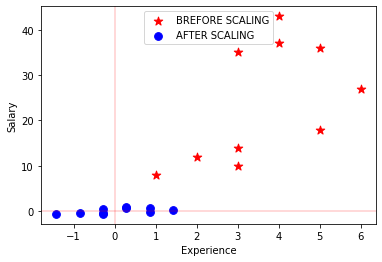

In [24]:
ax = df_exp.plot.scatter(x="Experience", y="Salary",marker = '*',s=80, label='BREFORE SCALING',color='red')
df_exp_rbst_new.plot.scatter(x="Experience", y="Salary",marker = 'o',s=60,label='AFTER SCALING',
                               color='blue', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

Let’s now see what happens if we introduce an outlier and see the effect of scaling using Standard Scaler and Robust Scaler.

In [25]:
df = pd.DataFrame({"Weight":[64,68,62,59,110],"Height":[4,7,6,5,11]},index=["Tom","John","Magi","Joya","Tall"])
print(df)

      Weight  Height
Tom       64       4
John      68       7
Magi      62       6
Joya      59       5
Tall     110      11


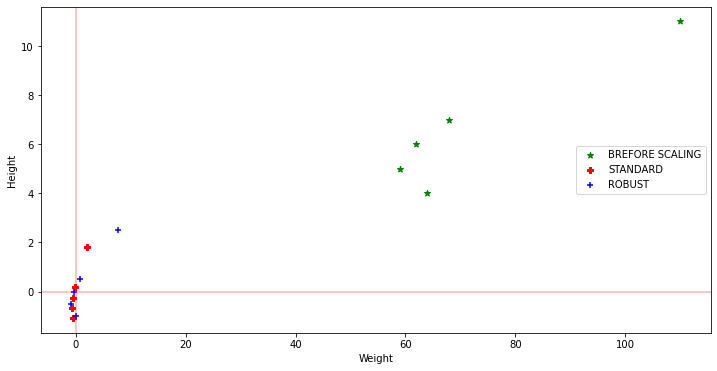

In [26]:
ax = df.plot.scatter(x='Weight', y='Height',color='green',marker = '*',s=40, label='BREFORE SCALING')

# Apply StandardScaler
scaler_s = StandardScaler()
df1 = pd.DataFrame(scaler_s.fit_transform(df),columns=['Weight','Height'],index = ["Tom","John","Magi","Joya","Tall"])
df1.plot.scatter(x='Weight', y='Height', color='red',marker = 'P',s=40,label='STANDARD', ax = ax,figsize=(12,6))

# Apply RobustScaler
scaler_r = RobustScaler()
df2 = pd.DataFrame(scaler_r.fit_transform(df),columns=['Weight','Height'],index = ["Tom","John","Magi","Joya","Tall"])
df2.plot.scatter(x='Weight', y='Height', color='blue',marker = '+',s=40,label='ROBUST', ax = ax,figsize=(12,6))

plt.axhline(0, color='red',alpha=0.3)
plt.axvline(0, color='red',alpha=0.3)